# Applying background rejection 

## 1. Introduction

This notebook is a tutorial on running the background rejection tool on IXPE data. We’ll do a rejection and a simple sanity check which is often the only thing that needs to be done on point sources.

It also highly recommended that new users read di Marco et al. 2023 ([linked here](https://iopscience.iop.org/article/10.3847/1538-3881/acba0f)) for a better understanding of the tool.

<div style='color: #333; background: #ffffdf; padding:20px; border: 4px solid #fadbac'>
<b>Before running this notebook:</b><br>
    
&bull; Make sure the filter_background.py script is downloaded and accessible from your working directory  (<a href='https://github.com/aledimarco/IXPE-background'>Download</a>).<br>

&bull; Make sure ixpeobssim is installed (<a href='https://heasarc.gsfc.nasa.gov/docs/software/lheasoft/'>Download and Install heasoft</a>). You will not need this to run the background rejection tool, but it is needed for vizualising the results at the end.<br>
    
&bull; Unlike on Sciserver, where the data is available locally, you will need to download the data to your machine.<br>
</div>



We will be using obsid 02009701 for this example. Before running this notebook, please ensure that the data are downloaded into the folder where the notebook is being run. You will need both the level 1 and level 2 event files. These can be downloaded from HEASARC using the wget command, e.g.

```
wget -q -nH --no-check-certificate --cut-dirs=5 -r -l0 -c -N -np -R 'index*' -erobots=off --retr-symlinks https://heasarc.gsfc.nasa.gov/FTP/ixpe/data/obs/02//02009701/event_l1/

wget -q -nH --no-check-certificate --cut-dirs=5 -r -l0 -c -N -np -R 'index*' -erobots=off --retr-symlinks https://heasarc.gsfc.nasa.gov/FTP/ixpe/data/obs/02//02009701/event_l2/
```

## 2. Module Imports
We need the following modules:

In [1]:
import glob
import ixpeobssim.core.pipeline as pipeline

>>> Loading XSPEC local models from the "ixpeobssim" package in /Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/xspec...
>>> Could not XSPEC load local models.

***Error: Xspec was unable to load the model package: ixpeobssim
   Either it could not find the model library file in the directory:
/Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/xspec
   or the file contains errors.
   (try "load (path)/(lib filename)" for more error info)
>>> (This might indicate that you need to compile them.)
>>> See the documentation for more info about XSPEC support.
>>> Done.


## 3. Background filtering

Now, run the script on DU1. Takes a little while to run, but should get you through in seconds, minutes at most. 

In [2]:
!python filter_background.py ./02009701/event_l2/ixpe02009701_det1_evt2_v01.fits ./02009701/event_l1/ixpe02009701_det1_evt1_v01.fits --output rej

./02009701/event_l2/ixpe02009701_det1_evt2_v01.fits  opening
Filename: ./02009701/event_l2/ixpe02009701_det1_evt2_v01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    225   272951R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     53   571R x 2C   [D, D]   
./02009701/event_l1/ixpe02009701_det1_evt1_v01.fits  opening
Filename: ./02009701/event_l1/ixpe02009701_det1_evt1_v01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   ()      
  1  EVENTS        1 BinTableHDU    206   3128989R x 39C   ['1J', '1J', '1J', '1J', '1D', '1J', '1I', '1I', '1I', '1I', '1J', '1I', '1I', '1I', '16X', '16X', '1I', '1I', '1E', '1E', '1I', '1I', '1J', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', 'QI(3952)', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     54   314R 

The above produces _rej-tagged fits files containing a list of X-ray only events.

Run this on DU2 and DU3 as well.

In [3]:
!python filter_background.py ./02009701/event_l2/ixpe02009701_det2_evt2_v01.fits ./02009701/event_l1/ixpe02009701_det2_evt1_v01.fits --output rej
    
!python filter_background.py ./02009701/event_l2/ixpe02009701_det3_evt2_v01.fits ./02009701/event_l1/ixpe02009701_det3_evt1_v01.fits --output rej

./02009701/event_l2/ixpe02009701_det2_evt2_v01.fits  opening
Filename: ./02009701/event_l2/ixpe02009701_det2_evt2_v01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    225   282161R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     53   578R x 2C   [D, D]   
./02009701/event_l1/ixpe02009701_det2_evt1_v01.fits  opening
Filename: ./02009701/event_l1/ixpe02009701_det2_evt1_v01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   ()      
  1  EVENTS        1 BinTableHDU    206   1704003R x 39C   ['1J', '1J', '1J', '1J', '1D', '1J', '1I', '1I', '1I', '1I', '1J', '1I', '1I', '1I', '16X', '16X', '1I', '1I', '1E', '1E', '1I', '1I', '1J', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', 'QI(3952)', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     54   313R 

### 3a. Background filtering

If you are interested in the events that have been rejected (for debugging reasons), you need to run the script with a 'bkg' option for the output.

In [4]:
!python filter_background.py ./02009701/event_l2/ixpe02009701_det1_evt2_v01.fits \
    ./02009701/event_l1/ixpe02009701_det1_evt1_v01.fits --output bkg

!python filter_background.py ./02009701/event_l2/ixpe02009701_det2_evt2_v01.fits \
    ./02009701/event_l1/ixpe02009701_det2_evt1_v01.fits --output bkg
    
!python filter_background.py ./02009701/event_l2/ixpe02009701_det3_evt2_v01.fits \
     ./02009701/event_l1/ixpe02009701_det3_evt1_v01.fits --output bkg


./02009701/event_l2/ixpe02009701_det1_evt2_v01.fits  opening
Filename: ./02009701/event_l2/ixpe02009701_det1_evt2_v01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    225   272951R x 10C   ['J', 'D', '16X', '16X', 'J', 'E', 'E', 'E', 'D', 'D']   
  2  GTI           1 BinTableHDU     53   571R x 2C   [D, D]   
./02009701/event_l1/ixpe02009701_det1_evt1_v01.fits  opening
Filename: ./02009701/event_l1/ixpe02009701_det1_evt1_v01.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   ()      
  1  EVENTS        1 BinTableHDU    206   3128989R x 39C   ['1J', '1J', '1J', '1J', '1D', '1J', '1I', '1I', '1I', '1I', '1J', '1I', '1I', '1I', '16X', '16X', '1I', '1I', '1E', '1E', '1I', '1I', '1J', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', '1E', 'QI(3952)', 'E', 'E', 'E', 'E']   
  2  GTI           1 BinTableHDU     54   314R 

## 4. Plotting the results

Let’s make a basic check to see if everything went right: let’s make a cmap with xpbin. To increase the signal we are going to stack all three DUs (using the wildcard character in the list of file names).

In [5]:
filelist_bkg = glob.glob('./02009701/event_l2/ixpe02009701_det*_evt2_v01_bkg.fits')

cmap_list = pipeline.xpbin(*filelist_bkg, algorithm='CMAP')


>>> Opening input event file ./02009701/event_l2/ixpe02009701_det3_evt2_v01_bkg.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: ./02009701/event_l2/ixpe02009701_det3_evt2_v01_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    221   46978R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     53   574R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 330.68038  42.27777  
CRPIX : 299.0  299.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>>

Filename: ./02009701/event_l2/ixpe02009701_det2_evt2_v01_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    221   50761R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     53   578R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 330.68038  42.27777  
CRPIX : 299.0  299.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> MONTE_CARLO extension not available, cannot retrieve simulation IRF name
>>> Setting outfile to ./02009701/event_l2/ixpe02009701_det2_evt2_v01_bkg_cmap.fits...
>>> Setting xref to 330.68038...
>>> Setting yref to 42.27777...
>>> Closing event file ./02009701/event_l2/ixpe02009701_det3_evt2_v01_bkg.fits...
>>> Output file ./02009701/event_l2/ixpe02009701_det2_evt2_v01_bkg_cmap.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Opening input event file ./02009701/event_l2/ixpe0

Filename: ./02009701/event_l2/ixpe02009701_det1_evt2_v01_bkg.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    221   55027R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     53   571R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 330.68038  42.27777  
CRPIX : 299.0  299.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> MONTE_CARLO extension not available, cannot retrieve simulation IRF name
>>> Setting outfile to ./02009701/event_l2/ixpe02009701_det1_evt2_v01_bkg_cmap.fits...
>>> Setting xref to 330.68038...
>>> Setting yref to 42.27777...
>>> Closing event file ./02009701/event_l2/ixpe02009701_det2_evt2_v01_bkg.fits...
>>> Output file ./02009701/event_l2/ixpe02009701_det1_evt2_v01_bkg_cmap.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Closing event file ./02009701/event_l2/ixpe0200970

And now let’s visualize it with xpbinview. The resulting count map will pop up almost immediately. We are looking for a residual trace of the source to see whether some good events have leaked into the rejected events.

>>> Reading (in memory) ./02009701/event_l2/ixpe02009701_det3_evt2_v01_bkg_cmap.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (200, 200)   float64   


Set MJD-OBS to 60255.030650 from DATE-OBS.
Set MJD-END to 60265.825060 from DATE-END'. [astropy.wcs.wcs]
>>> Reading (in memory) ./02009701/event_l2/ixpe02009701_det2_evt2_v01_bkg_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (200, 200)   float64   


>>> Reading (in memory) ./02009701/event_l2/ixpe02009701_det1_evt2_v01_bkg_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      51   (200, 200)   float64   


>>> xBinnedMap content:
{}
/Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/core/fitsio.py:489: RuntimeWarning: divide by zero encountered in scalar divide
  log_a = vmax / vmin


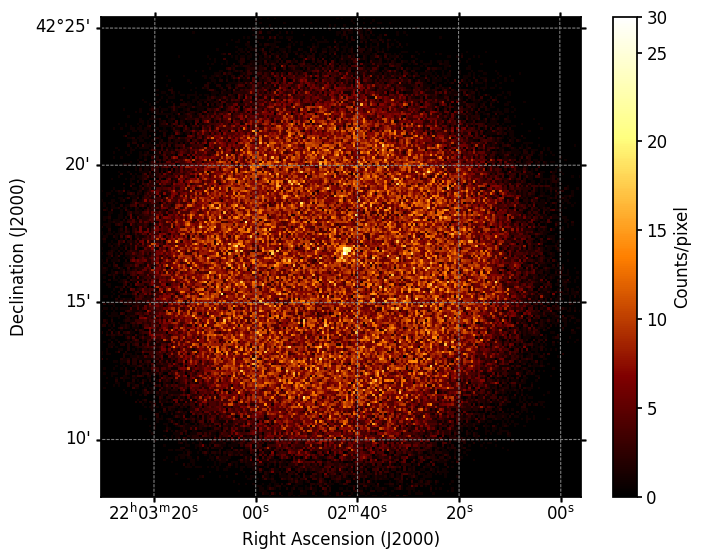

In [6]:
pipeline.xpbinview(*cmap_list)

Similar to above, we can use the list of _rej-tagged fits files containing a list of X-ray only events to look at the "clean" events.

In [7]:
filelist_clean = glob.glob('./02009701/event_l2/ixpe02009701_det*_evt2_v01_rej.fits')

cmap_list_clean = pipeline.xpbin(*filelist_clean, algorithm='CMAP')

>>> Opening input event file ./02009701/event_l2/ixpe02009701_det2_evt2_v01_rej.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: ./02009701/event_l2/ixpe02009701_det2_evt2_v01_rej.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    221   231400R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     53   578R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
image-header keyword DATE-OBS in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFF in binary table. [astropy.wcs.wcs]
image-header keyword MJDREFI in binary table. [astropy.wcs.wcs]
image-header keyword TELAPSE in binary table. [astropy.wcs.wcs]
image-header keyword TIMESYS in binary table. [astropy.wcs.wcs]
image-header keyword TIMEUNIT in binary table. [astropy.wcs.wcs]
image-header keyword TSTART in binary table. [astropy.wcs.wcs]
image-header keyword TSTOP in binary table. [astropy.wcs.wcs]
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 330.68038  42.27777  
CRPIX : 299.0  299.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>>

Filename: ./02009701/event_l2/ixpe02009701_det3_evt2_v01_rej.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    221   216613R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     53   574R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 330.68038  42.27777  
CRPIX : 299.0  299.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> MONTE_CARLO extension not available, cannot retrieve simulation IRF name
>>> Setting outfile to ./02009701/event_l2/ixpe02009701_det3_evt2_v01_rej_cmap.fits...
>>> Setting xref to 330.68038...
>>> Setting yref to 42.27777...
>>> Closing event file ./02009701/event_l2/ixpe02009701_det2_evt2_v01_rej.fits...
>>> Output file ./02009701/event_l2/ixpe02009701_det3_evt2_v01_rej_cmap.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Opening input event file ./02009701/event_l2/ixpe0

Filename: ./02009701/event_l2/ixpe02009701_det1_evt2_v01_rej.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      62   ()      
  1  EVENTS        1 BinTableHDU    221   217924R x 10C   [J, D, 16X, 16X, J, E, E, E, D, D]   
  2  GTI           1 BinTableHDU     53   571R x 2C   [D, D]   


>>> Reading WCS information from the EVENTS HDU...
>>> WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 330.68038  42.27777  
CRPIX : 299.0  299.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.00072222  0.00072222  
NAXIS : 600  600
>>> Loading data from the MONTE_CARLO extension...
>>> Event file comes without a MONTE_CARLO extension.
>>> Re-building the ROI table...
>>> Input file has no ROITABLE extension, cannot rebuild ROI table.
>>> MONTE_CARLO extension not available, cannot retrieve simulation IRF name
>>> Setting outfile to ./02009701/event_l2/ixpe02009701_det1_evt2_v01_rej_cmap.fits...
>>> Setting xref to 330.68038...
>>> Setting yref to 42.27777...
>>> Closing event file ./02009701/event_l2/ixpe02009701_det3_evt2_v01_rej.fits...
>>> Output file ./02009701/event_l2/ixpe02009701_det1_evt2_v01_rej_cmap.fits already exists.
>>> Remove it or set "overwrite = True" to overwite it.
>>> Closing event file ./02009701/event_l2/ixpe0200970

>>> Reading (in memory) ./02009701/event_l2/ixpe02009701_det2_evt2_v01_rej_cmap.fits...



    Welcome to ixpeobssim 30.0.0 (built on Sat, 17 Dec 2022 07:18:16 +0100).

    Copyright (C) 2015--2022, the ixpeobssim team.

    ixpeobssim comes with ABSOLUTELY NO WARRANTY.
    This is free software, and you are welcome to redistribute it under certain
    conditions. See the LICENSE file for details.

    Visit https://bitbucket.org/ixpesw/ixpeobssim for more information.

Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (200, 200)   float64   


Set MJD-OBS to 60255.030650 from DATE-OBS.
Set MJD-END to 60265.825060 from DATE-END'. [astropy.wcs.wcs]
>>> Reading (in memory) ./02009701/event_l2/ixpe02009701_det3_evt2_v01_rej_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (200, 200)   float64   


>>> Reading (in memory) ./02009701/event_l2/ixpe02009701_det1_evt2_v01_rej_cmap.fits...


Filename: (No file associated with this HDUList)
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      53   (200, 200)   float64   


>>> xBinnedMap content:
{}
/Users/karur/miniforge3/lib/python3.10/site-packages/ixpeobssim/core/fitsio.py:489: RuntimeWarning: divide by zero encountered in scalar divide
  log_a = vmax / vmin


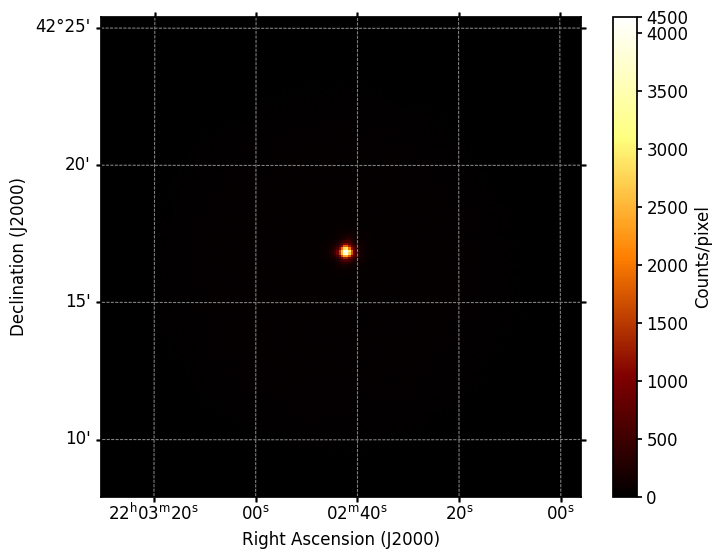

In [8]:
pipeline.xpbinview(*cmap_list_clean)